<a href="https://colab.research.google.com/github/enino84/VisualAnalytics/blob/main/CEC_PRO_08032022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

# **Fuente de Datos - Datos Abiertos**

https://www.datos.gov.co/Transporte/accidentes-calle-30-2015-2019/sefb-a755

In [ ]:
df_acc = pd.read_csv('https://www.datos.gov.co/api/views/yb9r-2dsi/rows.csv?accessType=DOWNLOAD');

In [ ]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39052 entries, 0 to 39051
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA_ACCIDENTE                   39052 non-null  object 
 1   AÑO_ACCIDENTE                     39052 non-null  int64  
 2   MES_ACCIDENTE                     39052 non-null  int64  
 3   DIA_ACCIDENTE                     39052 non-null  object 
 4   HORA_ACCIDENTE                    39052 non-null  object 
 5   GRAVEDAD_ACCIDENTE                39052 non-null  object 
 6   CLASE_ACCIDENTE                   39052 non-null  object 
 7   SITIO_EXACTO_ACCIDENTE            39051 non-null  object 
 8   CANT_HERIDOS_EN _SITIO_ACCIDENTE  8264 non-null   float64
 9   CANT_MUERTOS_EN _SITIO_ACCIDENTE  254 non-null    float64
 10  CANTIDAD_ACCIDENTES               39052 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 3.3+ MB


In [ ]:
df_acc.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39052 entries, 0 to 39051
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA_ACCIDENTE                   39052 non-null  object 
 1   AÑO_ACCIDENTE                     39052 non-null  int64  
 2   MES_ACCIDENTE                     39052 non-null  int64  
 3   DIA_ACCIDENTE                     39052 non-null  object 
 4   HORA_ACCIDENTE                    39052 non-null  object 
 5   GRAVEDAD_ACCIDENTE                39052 non-null  object 
 6   CLASE_ACCIDENTE                   39052 non-null  object 
 7   SITIO_EXACTO_ACCIDENTE            39051 non-null  object 
 8   CANT_HERIDOS_EN _SITIO_ACCIDENTE  8264 non-null   float64
 9   CANT_MUERTOS_EN _SITIO_ACCIDENTE  254 non-null    float64
 10  CANTIDAD_ACCIDENTES               39052 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 3.3+ MB


In [ ]:
df_acc.head(3)

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES
0,01/01/2015 12:00:00 AM,2015,1,Jue,02:10:00:PM,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1
1,01/01/2015 12:00:00 AM,2015,1,Jue,02:15:00:PM,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1
2,01/01/2015 12:00:00 AM,2015,1,Jue,02:20:00:PM,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1


In [ ]:
df_acc.columns

Index(['FECHA_ACCIDENTE', 'AÑO_ACCIDENTE', 'MES_ACCIDENTE', 'DIA_ACCIDENTE',
       'HORA_ACCIDENTE', 'GRAVEDAD_ACCIDENTE', 'CLASE_ACCIDENTE',
       'SITIO_EXACTO_ACCIDENTE', 'CANT_HERIDOS_EN _SITIO_ACCIDENTE',
       'CANT_MUERTOS_EN _SITIO_ACCIDENTE', 'CANTIDAD_ACCIDENTES'],
      dtype='object')

## Renombrar Columnas

In [ ]:
df_acc.columns = ['fecha', 'año', 'mes', 'día','hora', 'gravedad', 
                  'clase','sitio', 'heridos','muerts', 'accidentes']

In [ ]:
df_acc.head(3)

,fecha,año,mes,día,hora,gravedad,clase,sitio,heridos,muerts,accidentes
0,01/01/2015 12:00:00 AM,2015,1,Jue,02:10:00:PM,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1
1,01/01/2015 12:00:00 AM,2015,1,Jue,02:15:00:PM,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1
2,01/01/2015 12:00:00 AM,2015,1,Jue,02:20:00:PM,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1


# Agregación

1. Forman grupos por variables definidas
2. Aplicamos funciones matemáticas a los grupos

* Seleccionar las columnas
* Definir los grupos (sub-conjunto de columnas seleccionadas)
* Aplicar la función (o funciones) de agregación a cada conjunto.


# Accidentes por año

In [ ]:
select = ['año','accidentes'];
grupos = ['año'];
df_acc_por_año = df_acc[select].groupby(by=grupos).count()

In [ ]:
df_acc_por_año

,accidentes
año,
2015,6237
2016,6520
2017,6389
2018,5898
2019,5645
2020,3281
2021,4700
2022,382


In [ ]:
df_acc_por_año.columns

Index(['accidentes'], dtype='object')

In [ ]:
df_acc_por_año.index

Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64', name='año')

# `reset_index()`

In [ ]:
df_acc_por_año.reset_index(inplace=True)

In [ ]:
df_acc_por_año

,año,accidentes
0,2015,6237
1,2016,6520
2,2017,6389
3,2018,5898
4,2019,5645
5,2020,3281
6,2021,4700
7,2022,382


In [ ]:
df_acc_por_año.columns

Index(['año', 'accidentes'], dtype='object')

In [ ]:
df_acc_por_año.index

RangeIndex(start=0, stop=8, step=1)

# `barplot()` accidentes por año

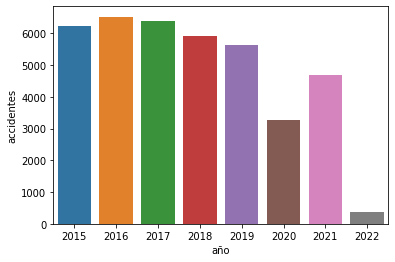

In [ ]:
sns.barplot(data=df_acc_por_año, x='año', y='accidentes')

# `lineplot()` accidentes por año

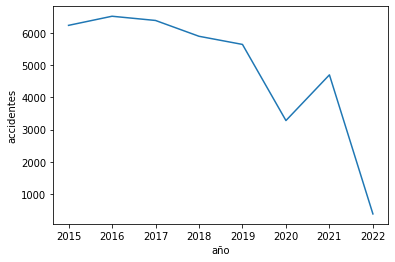

In [ ]:
sns.lineplot(data=df_acc_por_año, x='año', y='accidentes')

# **Accidentes por año y mes - 2 niveles de agrupamiento**  

In [ ]:
select = ['año','mes','accidentes'];
grupos = ['año','mes'];
df_acc_por_año_mes = df_acc[select].groupby(by=grupos).count()
df_acc_por_año_mes.reset_index(inplace=True);

In [ ]:
df_acc_por_año_mes

,año,mes,accidentes
0,2015,1,423
1,2015,2,466
2,2015,3,560
3,2015,4,518
4,2015,5,502
...,...,...,...
80,2021,9,404
81,2021,10,431
82,2021,11,458
83,2021,12,513


# `FacetGrid()`

1. Gráficas asociadas a variables cat con variables internas cuantitativas

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

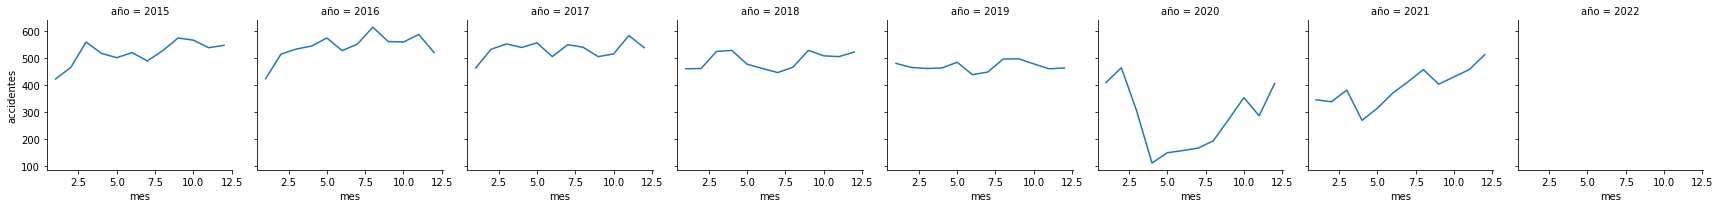

In [ ]:
lienzo = sns.FacetGrid(data=df_acc_por_año_mes, col='año')
lienzo.map(sns.lineplot, "mes", "accidentes")

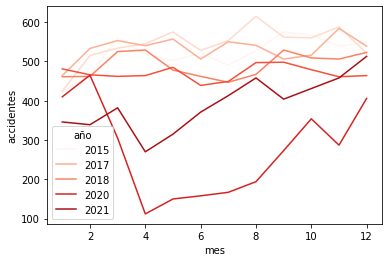

In [ ]:
sns.lineplot(data=df_acc_por_año_mes, x='mes', y='accidentes', hue='año', palette='Reds')

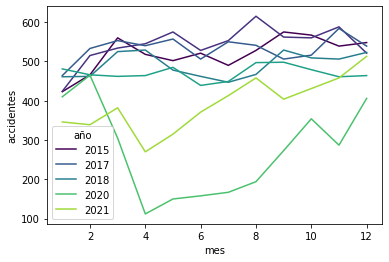

In [ ]:
sns.lineplot(data=df_acc_por_año_mes, x='mes', y='accidentes', hue='año', palette='viridis')

# Variabilidad de accidentes por día de semana en los últimos años

In [ ]:
select = ['día','año','accidentes'];
grupos = ['día','año'];
df_acc_por_día_año = df_acc[select].groupby(by=grupos).count()
df_acc_por_día_año.reset_index(inplace=True);

In [ ]:
df_acc_por_día_año.head(2)

,día,año,accidentes
0,Dom,2015,598
1,Dom,2016,595


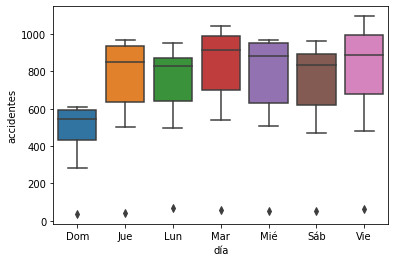

In [ ]:
sns.boxplot(data=df_acc_por_día_año, x='día', y='accidentes')

# **Año - Mes - Día de la Semana - Valores Puntuales**

In [ ]:
select = ['año','mes','día','accidentes'];
grupos = ['año','mes','día'];
df_acc_por_año_mes_día = df_acc[select].groupby(by=grupos).count()
df_acc_por_año_mes_día.reset_index(inplace=True);

In [ ]:
df_acc_por_año_mes_día

,año,mes,día,accidentes
0,2015,1,Dom,30
1,2015,1,Jue,68
2,2015,1,Lun,61
3,2015,1,Mar,52
4,2015,1,Mié,58
...,...,...,...,...
590,2022,1,Lun,70
591,2022,1,Mar,60
592,2022,1,Mié,55
593,2022,1,Sáb,51


# `catplot()`

In [ ]:
df_acc.columns

Index(['fecha', 'año', 'mes', 'día', 'hora', 'gravedad', 'clase', 'sitio',
       'heridos', 'muerts', 'accidentes'],
      dtype='object')

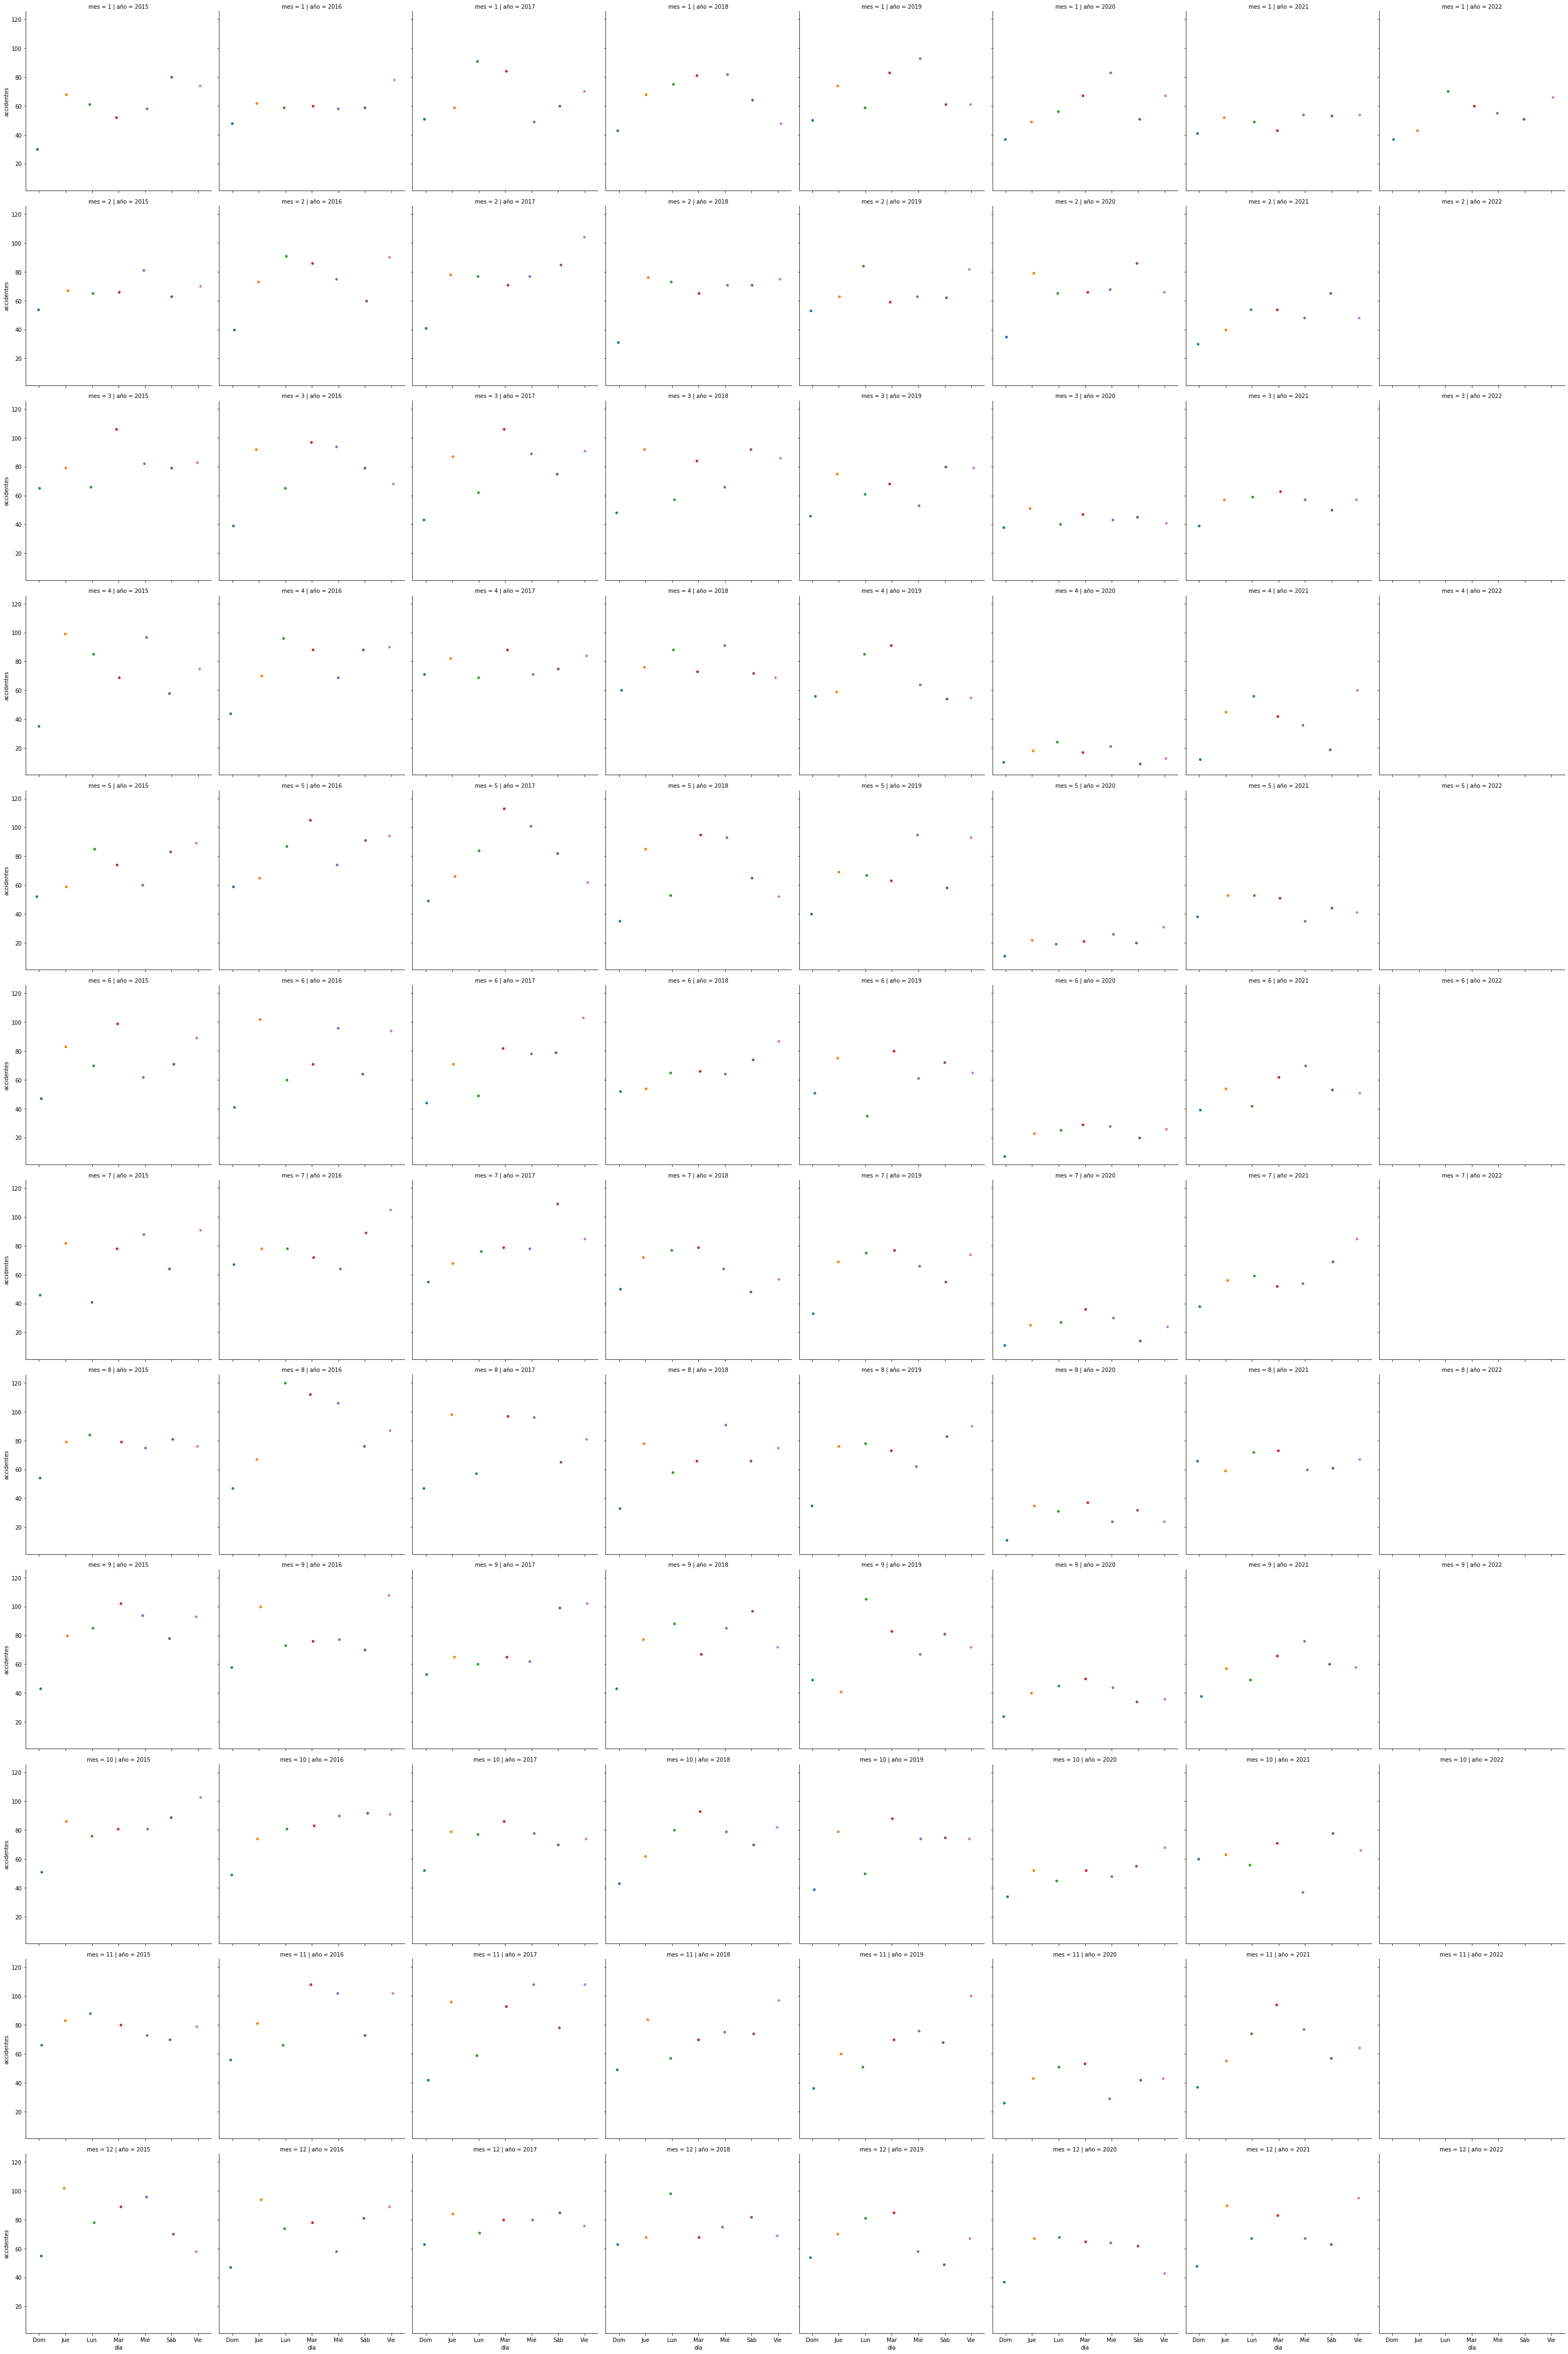

In [ ]:
sns.catplot(data=df_acc_por_año_mes_día, col='año', row='mes', x='día', y='accidentes')

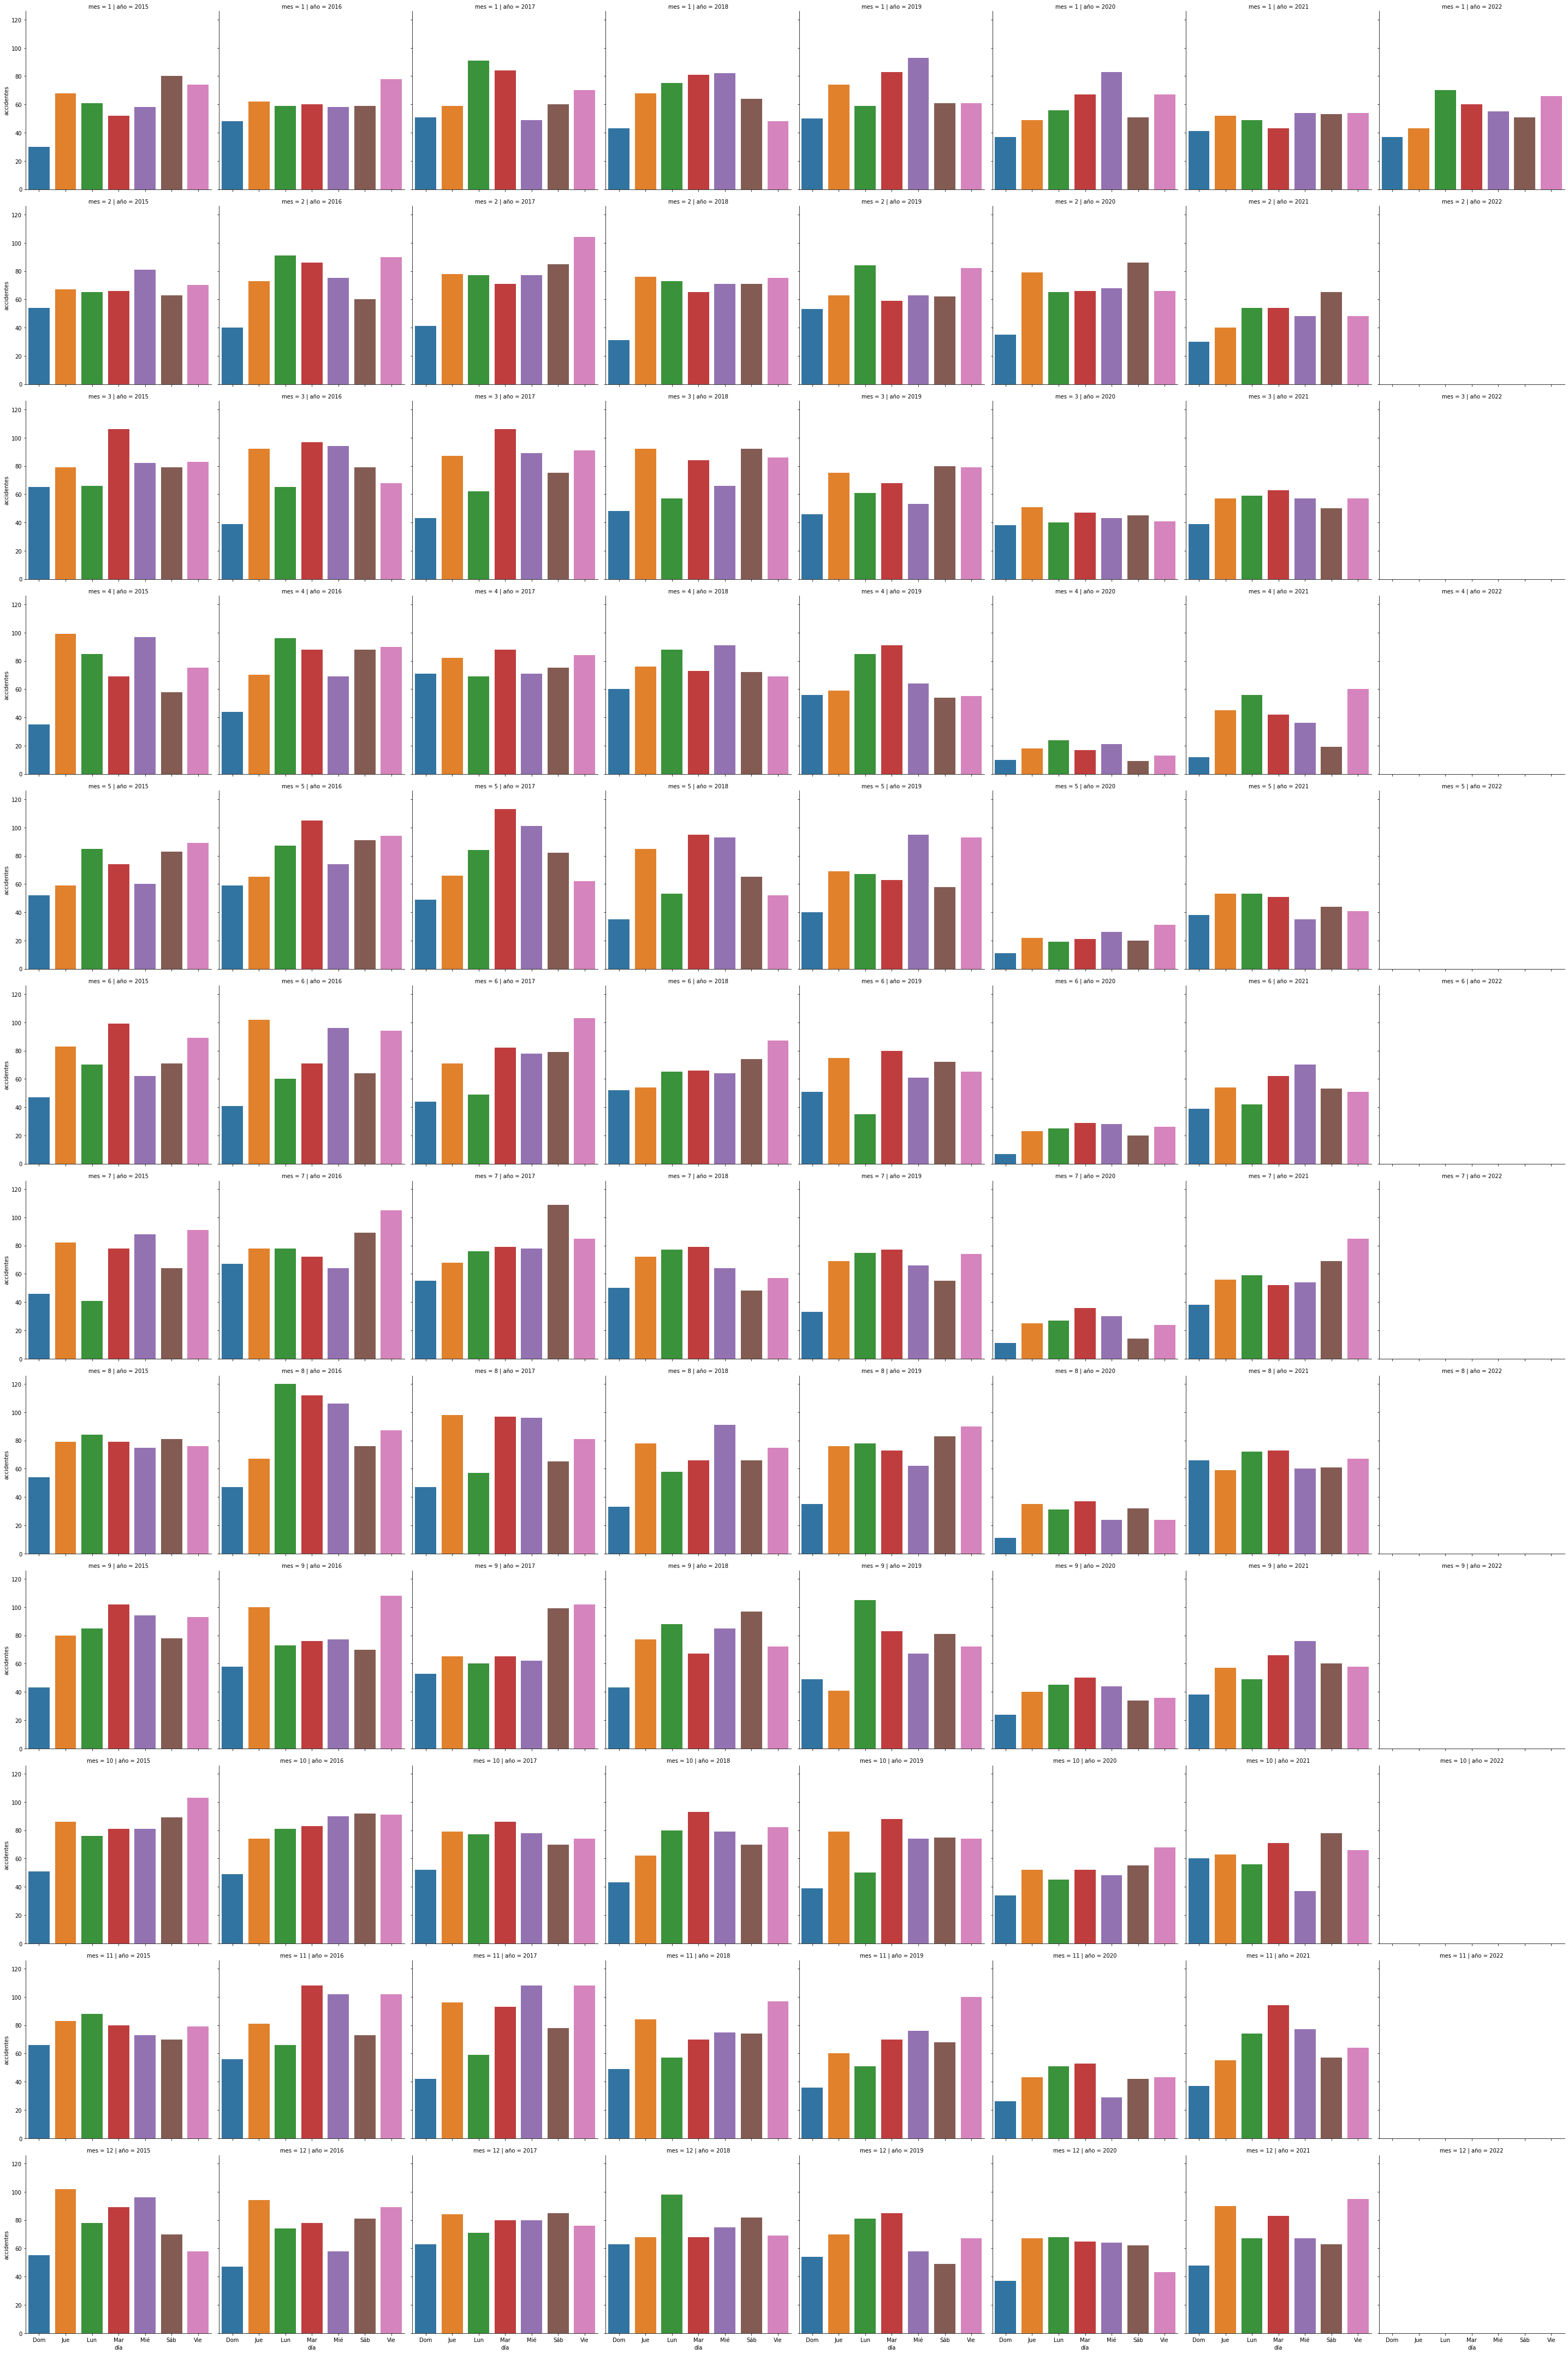

In [ ]:
sns.catplot(data=df_acc_por_año_mes_día, col='año', row='mes', 
            x='día', y='accidentes', kind='bar')

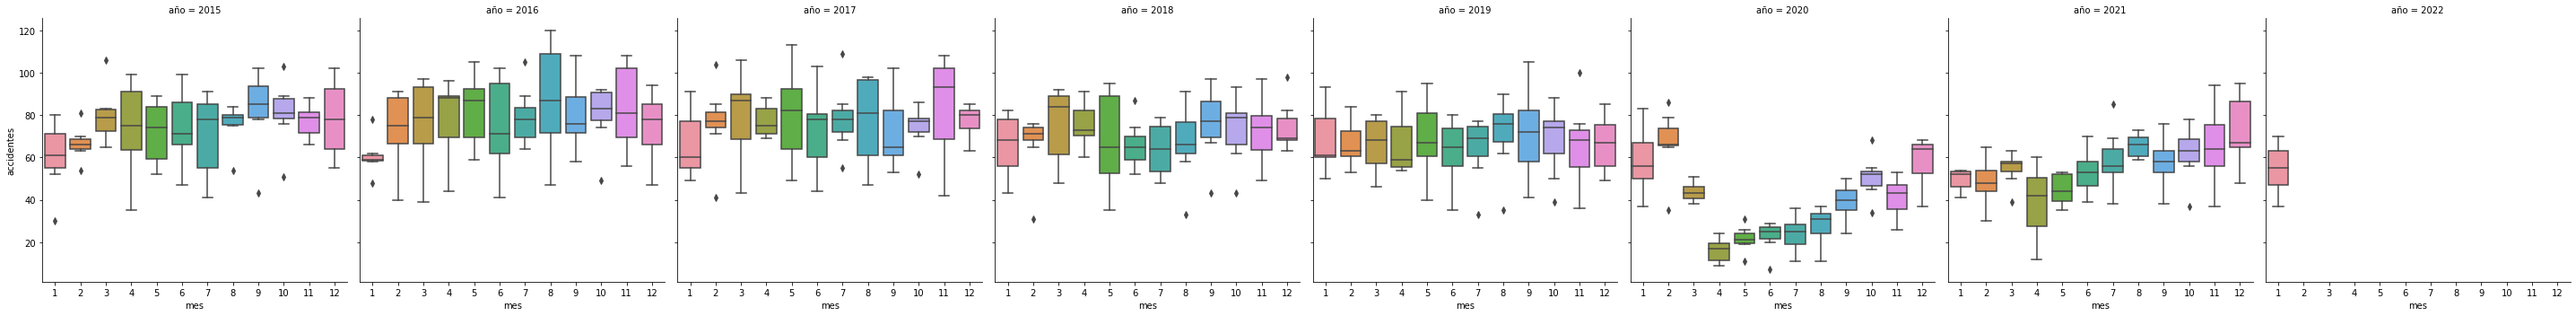

In [ ]:
sns.catplot(data=df_acc_por_año_mes_día, col='año', x='mes', y='accidentes', kind='box')

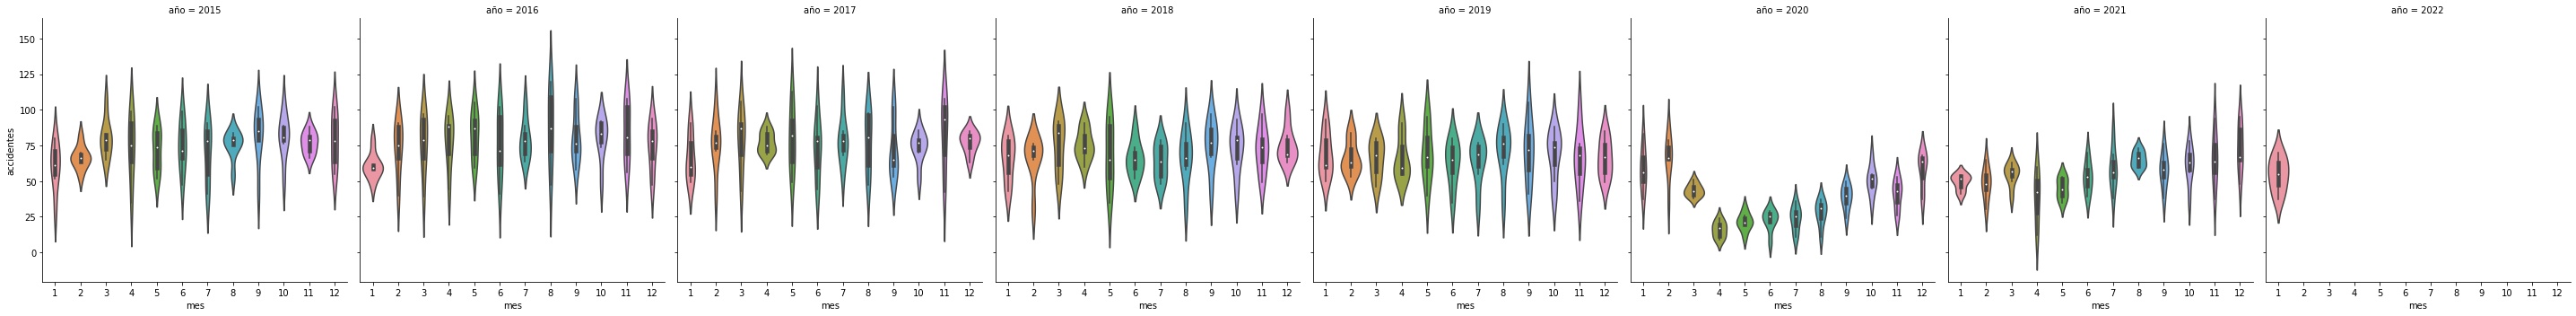

In [ ]:
sns.catplot(data=df_acc_por_año_mes_día, col='año', x='mes', y='accidentes', kind='violin')

# `Datetime()`

In [ ]:
df_acc['fecha']

0        01/01/2015 12:00:00 AM
1        01/01/2015 12:00:00 AM
2        01/01/2015 12:00:00 AM
3        01/01/2015 12:00:00 AM
4        01/01/2015 12:00:00 AM
                  ...          
39047    01/31/2022 12:00:00 AM
39048    01/31/2022 12:00:00 AM
39049    01/31/2022 12:00:00 AM
39050    01/31/2022 12:00:00 AM
39051    01/31/2022 12:00:00 AM
Name: fecha, Length: 39052, dtype: object

In [ ]:
df_acc['fecha'] = pd.to_datetime(df_acc['fecha'])

In [ ]:
df_acc['fecha']

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
39047   2022-01-31
39048   2022-01-31
39049   2022-01-31
39050   2022-01-31
39051   2022-01-31
Name: fecha, Length: 39052, dtype: datetime64[ns]

In [ ]:
df_acc['hora']

0        02:10:00:PM
1        02:15:00:PM
2        02:20:00:PM
3        03:30:00:PM
4        04:20:00:AM
            ...     
39047    11:00:00:AM
39048    11:25:00:AM
39049    12:00:00:PM
39050    12:20:00:AM
39051    12:30:00:PM
Name: hora, Length: 39052, dtype: object

In [ ]:
df_acc['hora'] = pd.to_datetime(df_acc['hora'], format='%I:%M:%S:%p')

In [ ]:
df_acc.head(4)

,fecha,año,mes,día,hora,gravedad,clase,sitio,heridos,muerts,accidentes
0,2015-01-01,2015,1,Jue,1900-01-01 14:10:00,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1
1,2015-01-01,2015,1,Jue,1900-01-01 14:15:00,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1
2,2015-01-01,2015,1,Jue,1900-01-01 14:20:00,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1
3,2015-01-01,2015,1,Jue,1900-01-01 15:30:00,Con heridos,Choque,CL 45 CR 19,2.0,NaN,1


In [ ]:
df_acc['hora']

0       1900-01-01 14:10:00
1       1900-01-01 14:15:00
2       1900-01-01 14:20:00
3       1900-01-01 15:30:00
4       1900-01-01 04:20:00
                ...        
39047   1900-01-01 11:00:00
39048   1900-01-01 11:25:00
39049   1900-01-01 12:00:00
39050   1900-01-01 00:20:00
39051   1900-01-01 12:30:00
Name: hora, Length: 39052, dtype: datetime64[ns]

In [ ]:
df_acc['hora'].dt.minute

0        10
1        15
2        20
3        30
4        20
         ..
39047     0
39048    25
39049     0
39050    20
39051    30
Name: hora, Length: 39052, dtype: int64

In [ ]:
df_acc['fecha'] = df_acc['fecha'] + pd.to_timedelta(df_acc['hora'].dt.hour, unit='hr') 
df_acc['fecha'] = df_acc['fecha'] + pd.to_timedelta(df_acc['hora'].dt.minute, unit='min')

In [ ]:
df_acc.drop(columns=['año','mes','día','hora'], inplace=True)

In [ ]:
df_acc.head(4)

,fecha,gravedad,clase,sitio,heridos,muerts,accidentes
0,2015-01-01 14:10:00,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1
1,2015-01-01 14:15:00,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1
2,2015-01-01 14:20:00,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1
3,2015-01-01 15:30:00,Con heridos,Choque,CL 45 CR 19,2.0,NaN,1


In [ ]:
df_acc.fillna(value=0, inplace=True)

In [ ]:
df_acc.head(4)

,fecha,gravedad,clase,sitio,heridos,muerts,accidentes
0,2015-01-01 14:10:00,Con heridos,Choque,VIA 40 CON 77,1.0,0.0,1
1,2015-01-01 14:15:00,Solo daños,Choque,CALLE 14 CR 13,0.0,0.0,1
2,2015-01-01 14:20:00,Solo daños,Choque,CL 74 CR 38C,0.0,0.0,1
3,2015-01-01 15:30:00,Con heridos,Choque,CL 45 CR 19,2.0,0.0,1


In [ ]:
df_acc['heridos'] = df_acc['heridos'].astype('int32')
df_acc['muerts'] = df_acc['muerts'].astype('int32')

In [ ]:
df_acc.head(4)

,fecha,gravedad,clase,sitio,heridos,muerts,accidentes
0,2015-01-01 14:10:00,Con heridos,Choque,VIA 40 CON 77,1,0,1
1,2015-01-01 14:15:00,Solo daños,Choque,CALLE 14 CR 13,0,0,1
2,2015-01-01 14:20:00,Solo daños,Choque,CL 74 CR 38C,0,0,1
3,2015-01-01 15:30:00,Con heridos,Choque,CL 45 CR 19,2,0,1


In [ ]:
horas = df_acc['fecha'].dt.hour
dias = df_acc['fecha'].dt.weekday

In [ ]:
select = ['accidentes'];
grupos = [horas];
df_acc_por_hora = df_acc[select].groupby(by=grupos).count()
df_acc_por_hora.reset_index(inplace=True);

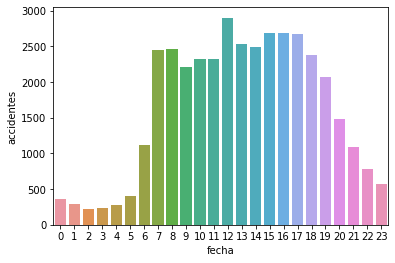

In [ ]:
sns.barplot(data=df_acc_por_hora, x='fecha', y='accidentes')

In [ ]:
horas = df_acc['fecha'].dt.hour
dias = df_acc['fecha'].dt.day_name()

In [ ]:
select = ['accidentes'];
grupos = [dias, horas];
df_acc_por_dia_hora = df_acc[select].groupby(by=grupos).count()
df_acc_por_dia_hora.index.names = ['día','hora'];
df_acc_por_dia_hora.reset_index(inplace=True);

In [ ]:
df_acc_por_dia_hora.head(3)

,día,hora,accidentes
0,Friday,0,45
1,Friday,1,34
2,Friday,2,17


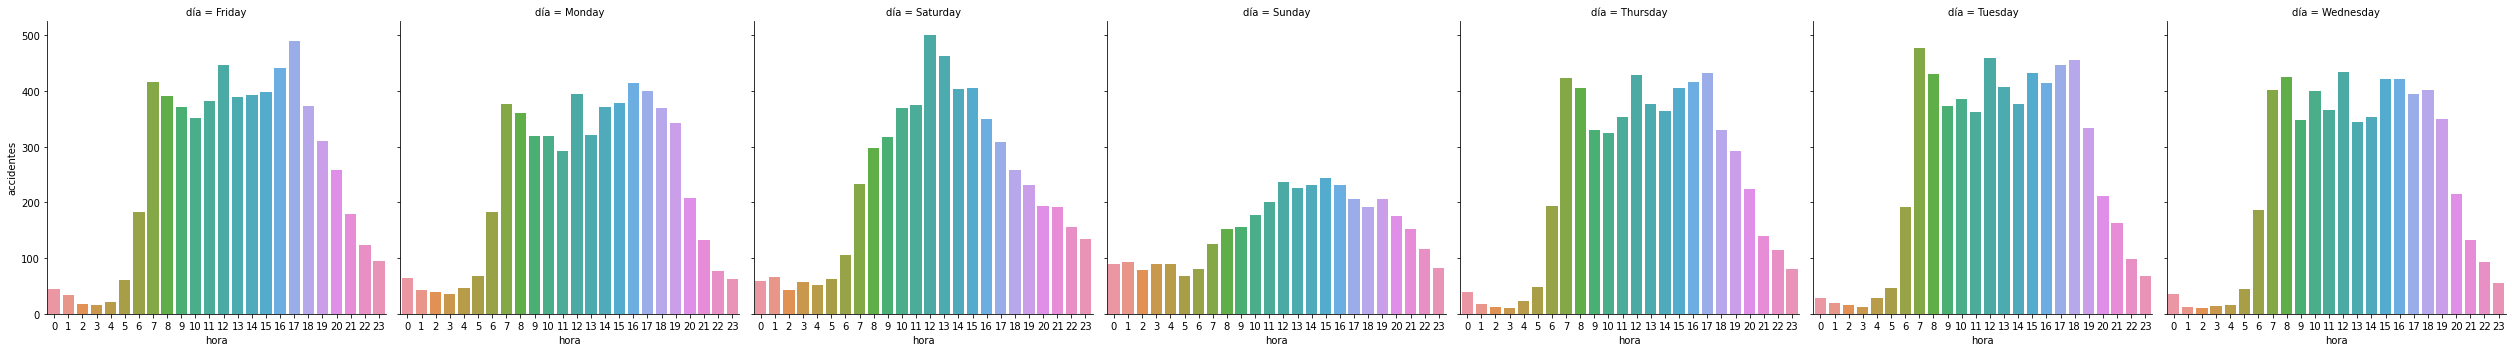

In [ ]:
sns.catplot(data=df_acc_por_dia_hora, col='día', x='hora', y='accidentes', kind='bar')

In [ ]:
horas = df_acc['fecha'].dt.hour
dias = df_acc['fecha'].dt.day_name()
mes = df_acc['fecha'].dt.month_name();

select = ['accidentes'];
grupos = [mes, dias, horas];
df_acc_por_mes_dia_hora = df_acc[select].groupby(by=grupos).count()
df_acc_por_mes_dia_hora.index.names = ['mes','día','hora'];
df_acc_por_mes_dia_hora.reset_index(inplace=True);

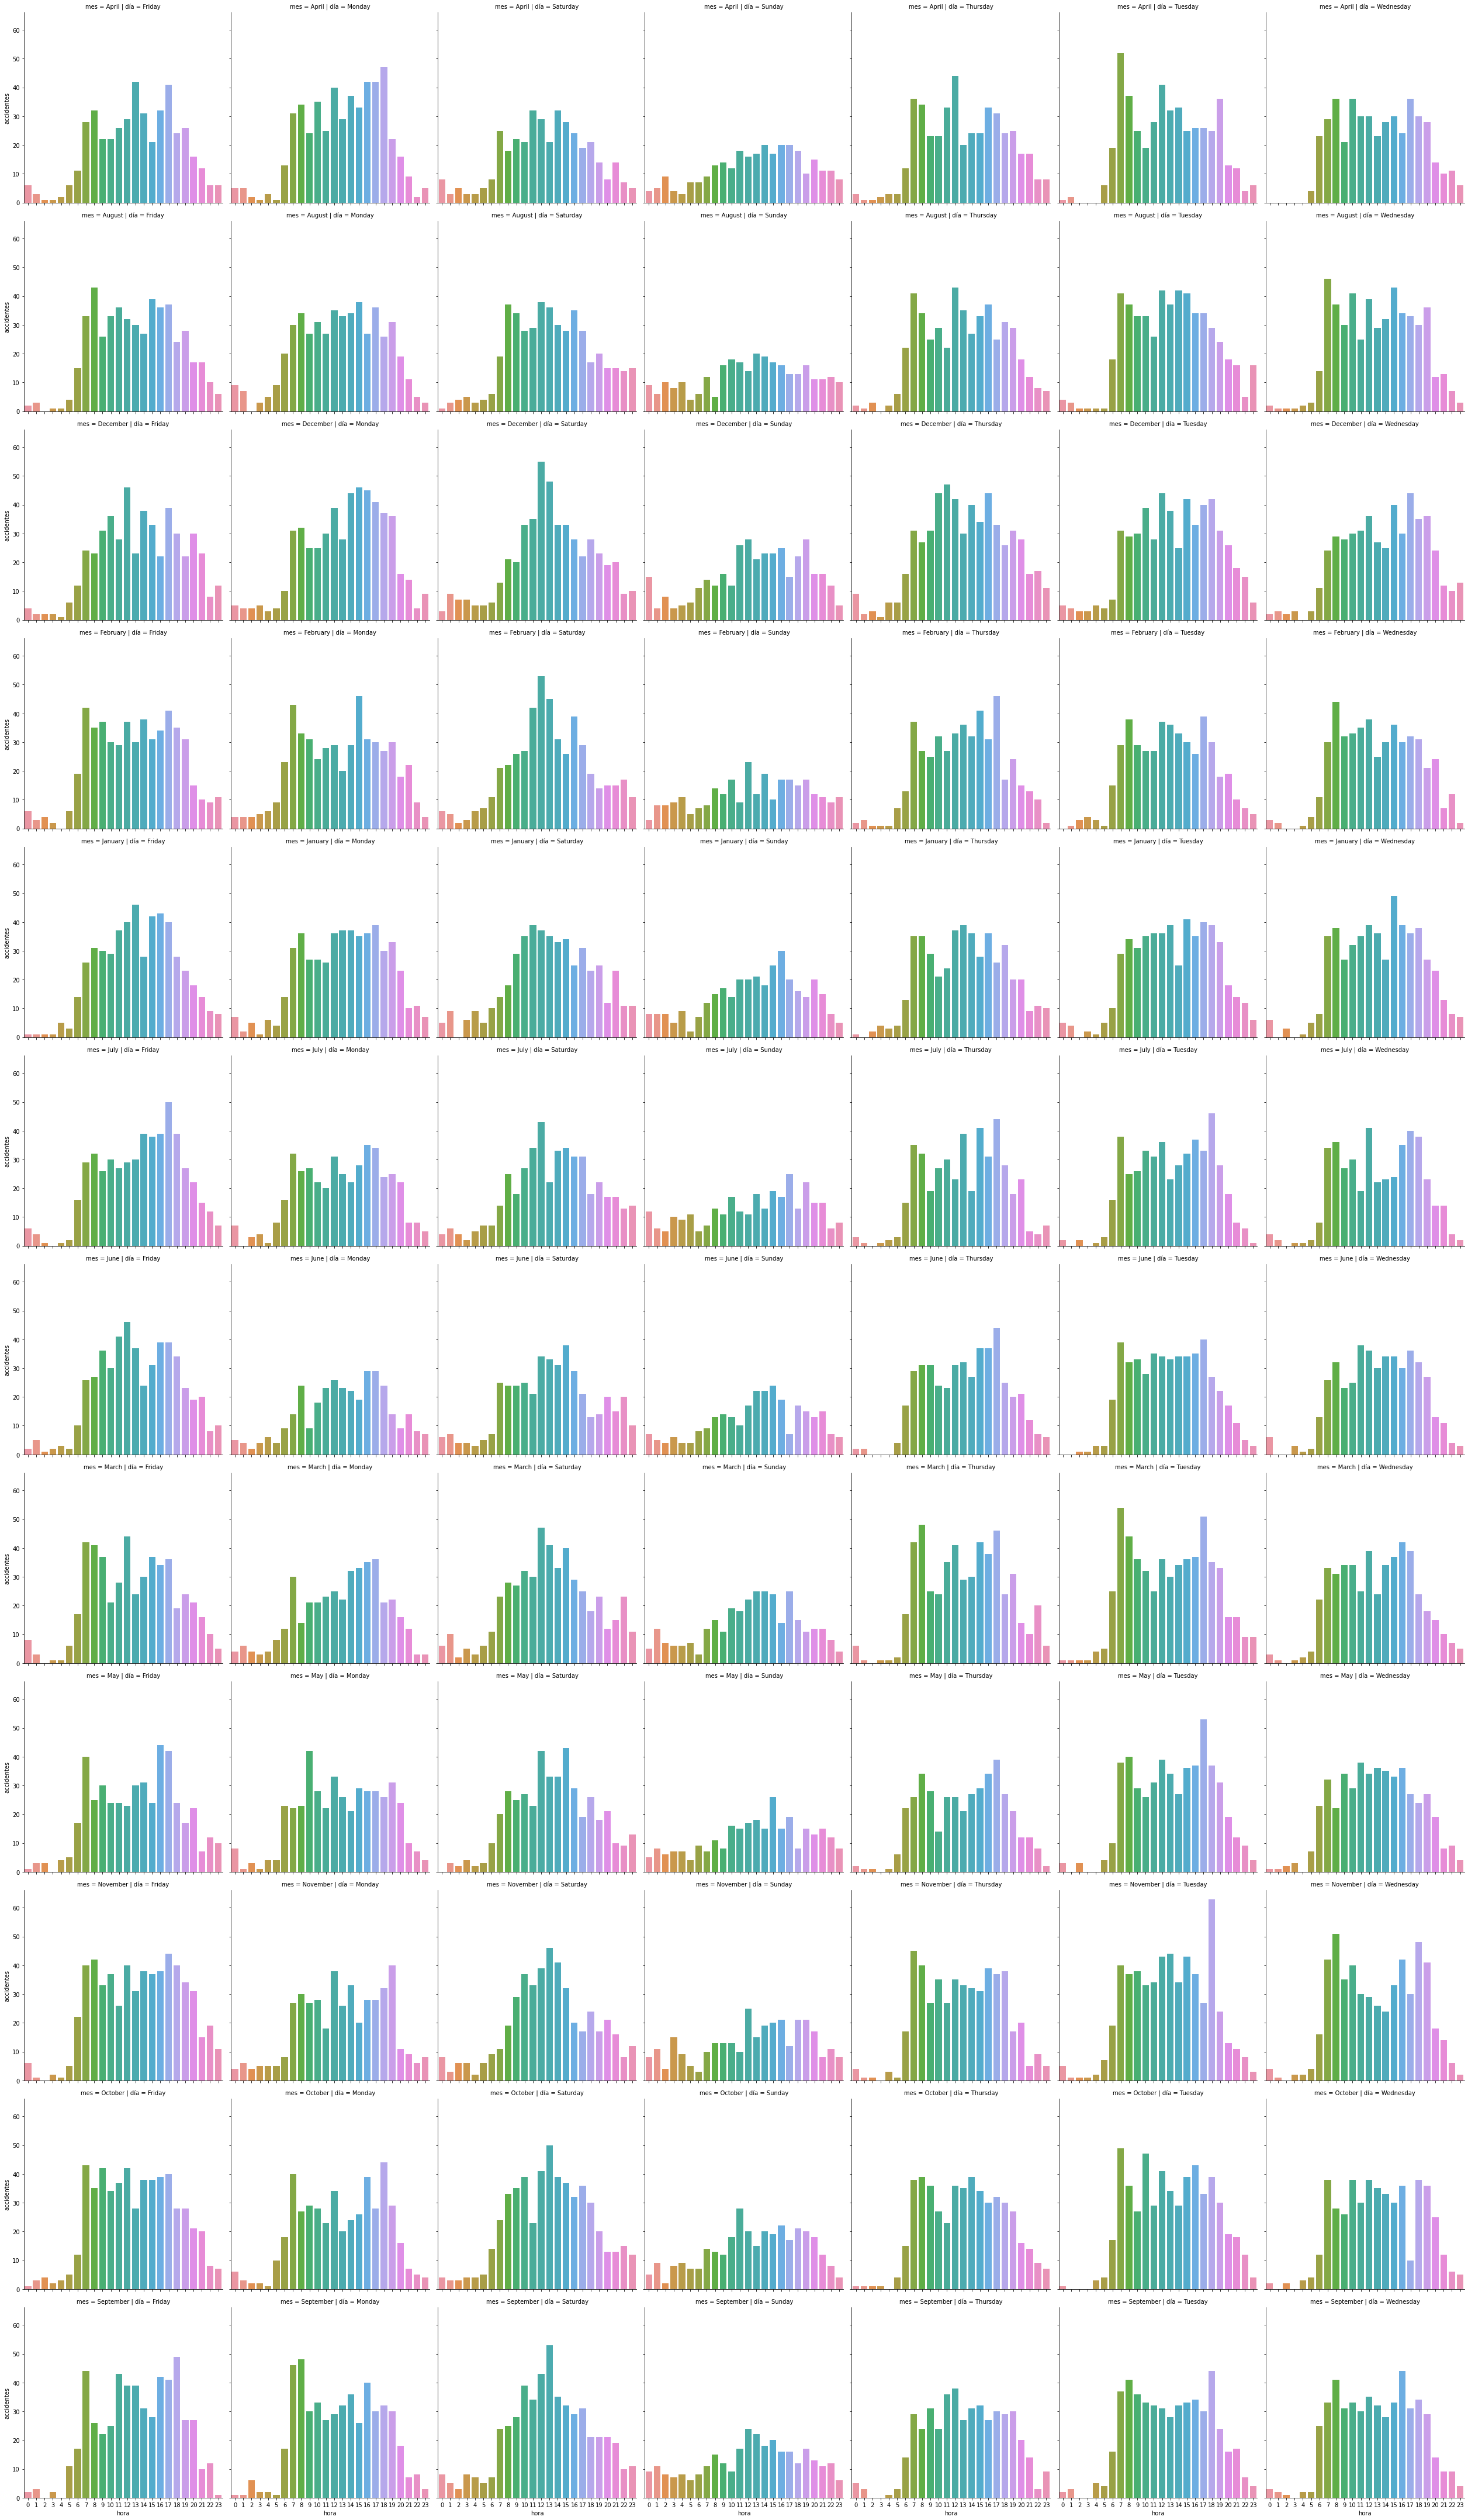

In [ ]:
sns.catplot(data=df_acc_por_dia_hora, row='mes', 
            col='día', x='hora', y='accidentes', kind='bar')